In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams["figure.figsize"] = (18, 6)

# Beer Advocate Informations

## ba_beers.csv

In [2]:
ba_beers = pd.read_csv('generated/new_ba_beers.csv')

| Column Name       | Description                                   | Commentary                              |
|-------------------|-----------------------------------------------|-----------------------------------------|
| beer_id           | id of each beer.                              |  unique for each beer. (int)            |
| beer_name         | name of the beer.                             | (str)                                     |
| brewery_id        | id of brewery of the beer.                    | unique for each brewery. (int)               |
| brewery_name      | name of the brewery.                              |  (str)            |
| style             | style of the beer.                            | 104 differents styles (str)             |
| nbr_ratings       | Total number of ratings for the beer.         | (int)               |
| nbr_reviews       | Total number of reviews for the beer.         | (int)               |
| avg        |       -           |              |
| ba_score        | aggregated rating for each beer         |   out of 100           |
| bros_score        | rating provided by the BeerAdvocate website's founders, Todd and Jason Alström, who are also known as "The Bros."                  |    out of 100          |
| abv        |  Alcohol by Volume                |    in %          |
| avg_computed      | "mean" of the different scores given in reviews                         |  ratings are coming from reviews.txt (txt)            |
| zscore             |        -                     |             |
| nbr_matched_valid_ratings|  Number of “valid” notes for this beer in cross-referenced data.       | when compared with another dataset such as RateBeer.            |
| avg_matched_valid_ratings|  Mean of “valid” notes for this beer in cross-referenced data.       |      |
| continent |  continent of the breweries.       | added to compare continents and group      |
| type|  type of the beer.       | added for comparison     |

We have not yet investigated the exact way in which avg and z_score have been calculated. We have not yet needed to use these parameters in our initial analyses, so we will analyse them if necessary when the time comes.

## ba_breweries.csv

In [3]:
ba_breweries = pd.read_csv('generated/new_ba_breweries.csv')

| Column Name | Description                                                   | Commentary                                        |
|-------------|---------------------------------------------------------------|---------------------------------------------------|
| id          | Unique identifier for each brewery in the RateBeer database.  | Distinct for each brewery (int)                   |
| location    | Geographic location of the brewery, including country/region. | Useful for regional analysis and trends (str)     |
| name        | Name of the brewery.                                          | Indicates the brewery’s commercial name (str)     |
| nbr_beers   | Number of beers produced by the brewery in the database.      | Reflects brewery production scale (int)           |
| country     | Country of the brewery.                                       |                                                   |
| continent   | Continent of the brewery.                                     |                                                   |

## ba_users.csv

In [4]:
ba_users = pd.read_csv('generated/new_ba_users.csv')

| Column Name  | Description                                                         | Commentary                                    |
|--------------|---------------------------------------------------------------------|-----------------------------------------------|
| nbr_ratings  | Total number of ratings left by the user for different beers.       | (int)                                         |
| user_id      | Unique identifier for the user.                                     | Unique to each user (int)                     |
| user_name    | Username or display name of the user.                               | (str)                                         |
| joined       | User's registration date on the RateBeer platform (DD/MM/YYYY).     | (date)                                        |
| location     | location of the user                                                | (str)                                         |
| country     | Country of the user.                                                 | (str)                                         |
| continent   | Continent of the user.                                               | (str)                                         |


## ba_reviews.csv

In [5]:
ba_reviews = pd.read_parquet('generated/new_ba_reviews.parquet')

| Column Name     | Description                                                         | Commentary                                    |
|-----------------|---------------------------------------------------------------------|-----------------------------------------------|
| beer_name       | Name of the beer.                                                   | (str)                                         |
| beer_id         | Unique identifier for each beer.                                    | Distinct for each beer (int)                  |
| brewery_name    | Name of the brewery producing the beer.                             | (str)                                         |
| brewery_id      | Unique identifier for each brewery.                                 | Distinct for each brewery (int)               |
| style           | Style of the beer (e.g., IPA, Lager).                               | (str)                                         |
| abv             | Alcohol by volume percentage.                                       | Indicates the strength of the beer (float)    |
| date            | Date the beer was rated.                                            | (date)                                        |
| user_name       | Username or display name of the user who rated the beer.            | (str)                                         |
| user_id         | Unique identifier for the user who rated the beer.                  | Distinct for each user (int)                  |
| appearance      | Rating for the beer's appearance, up to 5.                           | Scores the visual presentation (int)          |
| aroma           | Rating for the beer's aroma, up to 5.                               | Scores the scent (int)                        |
| palate          | Rating for the beer's palate, up to 5.                              | Scores the feel on the tongue (int)           |
| taste           | Rating for the beer's taste, up to 5.                               | Scores the flavor (int)                       |
| overall         | Overall rating for the beer, up to 5.                               | General assessment (int)                      |
| rating          | Overall rating formula combining all parameters with unknown weights. | Provides a weighted score (float)             |
| text            | Textual review of the beer.                                          | User's comments on the beer (str)             |



# Beer Advocate Informations

## rb_beers.csv

In [6]:
rb_beers = pd.read_csv('generated/new_rb_beers.csv')

| Column Name       | Description                                   | Commentary                              |
|-------------------|-----------------------------------------------|-----------------------------------------|
| beer_id           | id of each beer.                              |  unique for each beer. (int)            |
| beer_name         | name of the beer.                             | (str)                                     |
| brewery_id        | id of brewery of the beer.                    | unique for each brewery. (int)               |
| brewery_name      | name of the brewery.                              |  (str)            |
| style             | style of the beer.                            | 104 differents styles (str)             |
| nbr_ratings       | Total number of ratings for the beer.         | between 0 and 16509 (most of them around 30 reviews). (int)               |
| overall_score     | global score.                                 |  based on mean of scores. (int)            |
| style_score       | score of the beer specific to its style.       | to compare to other beers of the same type.                                     |
| avg        |          -        |              |
| avg_computed      | mean of ratings.                         |  ratings comes from reviews.txt (txt)            |
| zscore             |            -                |             |
| nbr_matched_valid_ratings|  Number of “valid” notes for this beer in cross-referenced data.       | when compared with another dataset such as BeerAdvocate.            |
| avg_matched_valid_ratings|  Mean of “valid” notes for this beer in cross-referenced data.       |      |
| continent |  continent of the breweries.       |added to compare between continents.      |
| type|  type of the beer.       | added for comparison     |


We have not yet investigated the exact way in which avg and z_score have been calculated. We have not yet needed to use these parameters in our initial analyses, so we will analyse them if necessary when the time comes.

## rb_breweries.csv

In [7]:
rb_breweries = pd.read_csv('generated/new_rb_breweries.csv')

| Column Name | Description                                                   | Commentary                                        |
|-------------|---------------------------------------------------------------|---------------------------------------------------|
| id          | Unique identifier for each brewery in the RateBeer database.  | Distinct for each brewery (int)                   |
| location    | Geographic location of the brewery, including country/region. | Useful for regional analysis and trends (str)     |
| name        | Name of the brewery.                                          | Indicates the brewery’s commercial name (str)     |
| nbr_beers   | Number of beers produced by the brewery in the database.      | Reflects brewery production scale (int)           |
| country     | Country of the brewery.                                       |                                                   |
| continent   | Continent of the brewery.                                     |                                                   |

## rb_users.csv

In [8]:
rb_users = pd.read_csv('generated/new_rb_users.csv')

| Column Name  | Description                                                         | Commentary                                    |
|--------------|---------------------------------------------------------------------|-----------------------------------------------|
| nbr_ratings  | Total number of ratings left by the user for different beers.       | (int)                                         |
| user_id      | Unique identifier for the user.                                     | Unique to each user (int)                     |
| user_name    | Username or display name of the user.                               | (str)                                         |
| joined       | User's registration date on the RateBeer platform (DD/MM/YYYY).     | (date)                                        |
| location     | location of the user                                                | (str)                                         |
| country     | Country of the user.                                                 | (str)                                         |
| continent   | Continent of the user.                                               | (str)                                         |



## rb_reviews.csv

In [9]:
rb_reviews = pd.read_parquet('generated/new_rb_reviews.parquet')

| Column Name     | Description                                                         | Commentary                                    |
|-----------------|---------------------------------------------------------------------|-----------------------------------------------|
| beer_name       | Name of the beer.                                                   | (str)                                         |
| beer_id         | Unique identifier for each beer.                                    | Distinct for each beer (int)                  |
| brewery_name    | Name of the brewery producing the beer.                             | (str)                                         |
| brewery_id      | Unique identifier for each brewery.                                 | Distinct for each brewery (int)               |
| style           | Style of the beer (e.g., IPA, Lager).                               | (str)                                         |
| abv             | Alcohol by volume percentage.                                       | Indicates the strength of the beer (float)    |
| date            | Date the beer was rated.                                            | (date)                                        |
| user_name       | Username or display name of the user who rated the beer.            | (str)                                         |
| user_id         | Unique identifier for the user who rated the beer.                  | Distinct for each user (int)                  |
| appearance      | Rating for the beer's appearance, up to 5.                           | Scores the visual presentation (int)          |
| aroma           | Rating for the beer's aroma, up to 5.                               | Scores the scent (int)                        |
| palate          | Rating for the beer's palate, up to 5.                              | Scores the feel on the tongue (int)           |
| taste           | Rating for the beer's taste, up to 5.                               | Scores the flavor (int)                       |
| overall         | Overall rating for the beer, up to 5.                               | General assessment (int)                      |
| rating          | Overall rating formula combining all parameters with unknown weights. | Provides a weighted score (float)             |
| text            | Textual review of the beer.                                          | User's comments on the beer (str)             |


# Task 1 : Number of users : “Which platform attracts more reviewers over time ?”

## a) How does the number of reviewers evolve over time on both platforms ?


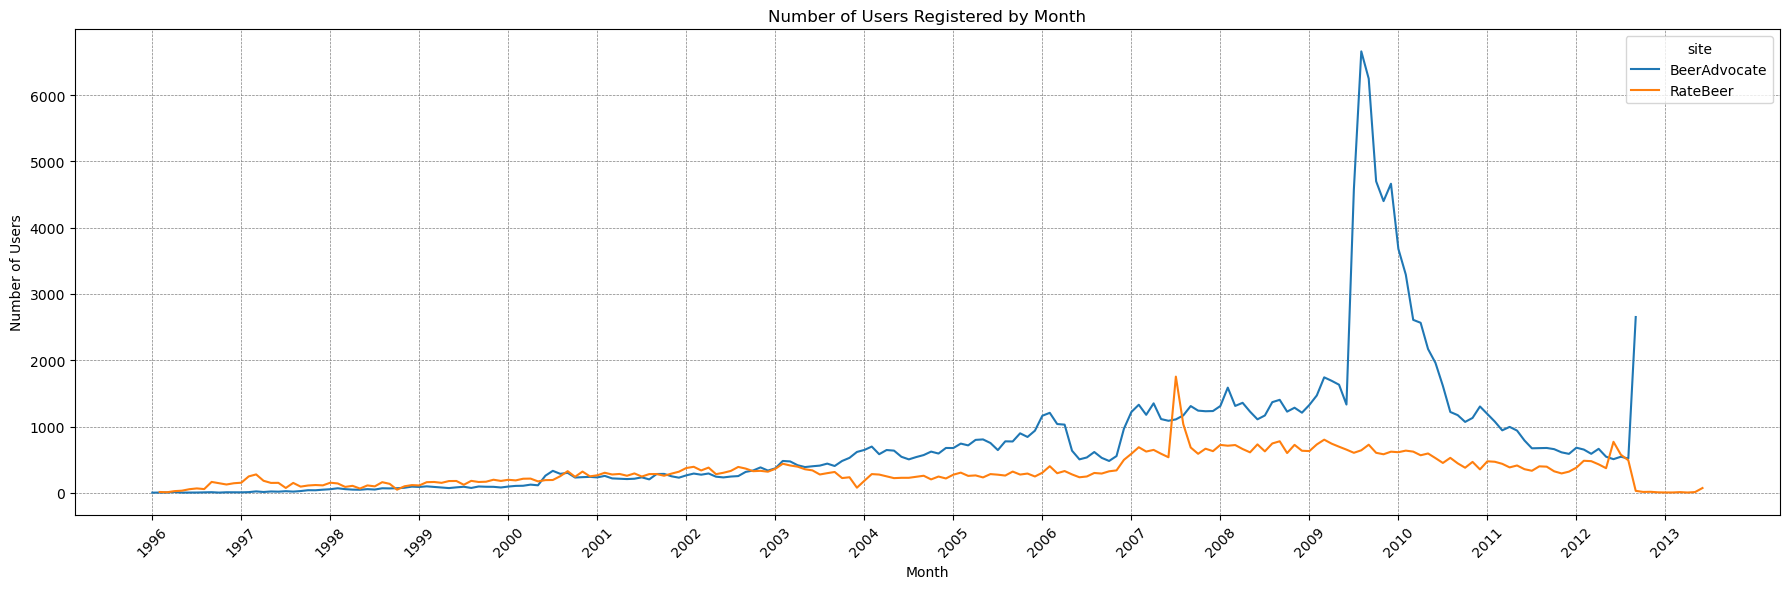

In [10]:
ba_users_plot = ba_users.copy()
rb_users_plot = rb_users.copy()
ba_users_plot["site"] = "BeerAdvocate"
rb_users_plot["site"] = "RateBeer"

# concatenation of users
df_plot = pd.concat([ba_users_plot, rb_users_plot], ignore_index=True)

# month and year calculation
df_plot['joined'] = pd.to_datetime(df_plot['joined'], format='%d/%m/%Y')
df_plot["month_year"] = df_plot['joined'].dt.to_period('M')
min_year = int(df_plot['joined'].dt.to_period('Y').sort_values().astype(str).iloc[0])
df_plot["month_year"] = df_plot["month_year"].astype(str)
nb_month = df_plot["month_year"].nunique()

# groupby site and month
df_plot = df_plot.groupby(["site","month_year"]).size().reset_index(name='nbr_users')

# figure 
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_plot, x='month_year', y='nbr_users',hue="site")

# title and ticks
plt.grid(True, axis='both', color='gray', linestyle='--', linewidth=0.5)
plt.title('Number of Users Registered by Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(ticks = np.arange(0,nb_month,12), labels=[year for year in range(min_year,min_year+len(np.arange(0,210,12)))], rotation=45)
plt.tight_layout()

plt.show()

## b) How are each platform’s reviewers distributed around the world over time ? Which platform is dominant in each region ?

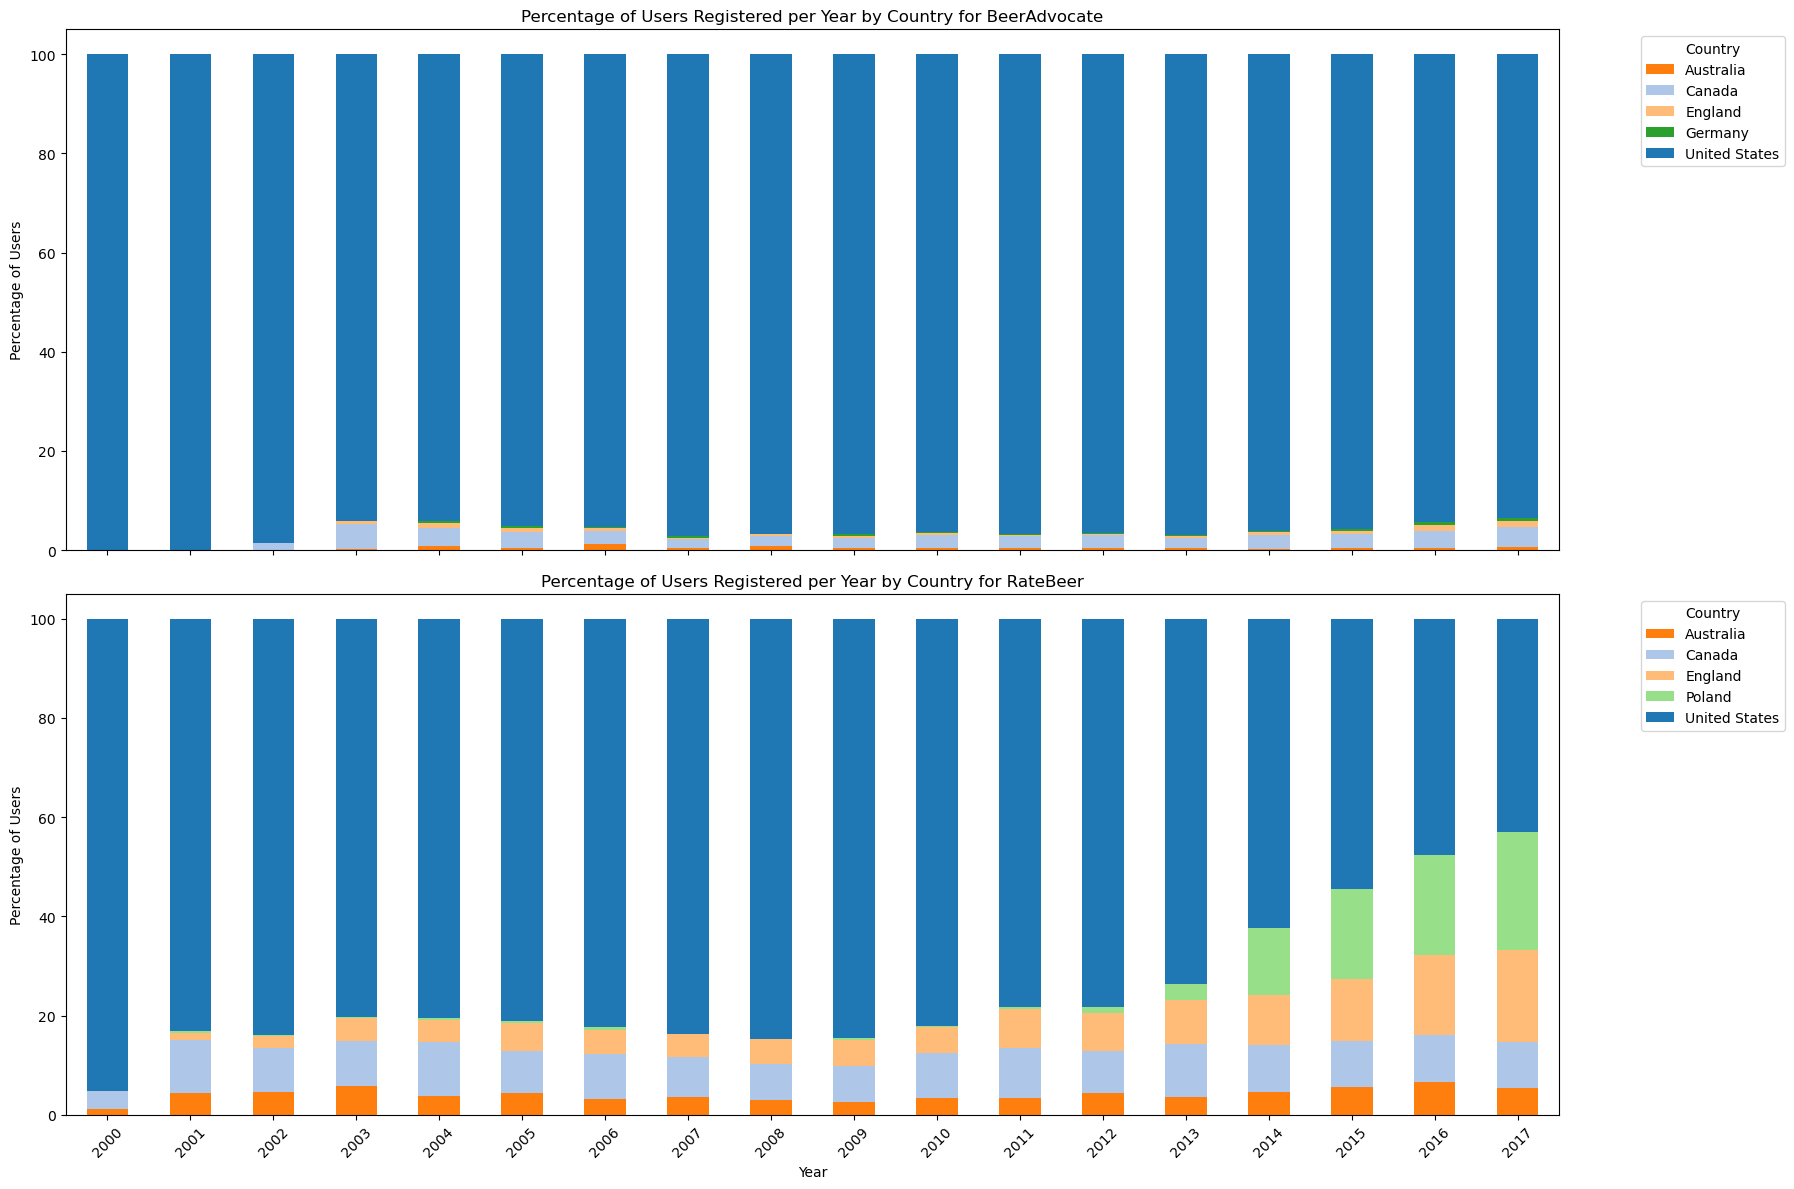

In [11]:
ba_users_plot = ba_users.copy()
rb_users_plot = rb_users.copy()
ba_users_plot["site"] = "BeerAdvocate"
rb_users_plot["site"] = "RateBeer"

# concatenation of users
df_plot = pd.concat([ba_users_plot, rb_users_plot], ignore_index=True)

# year calculation
df_plot['joined'] = pd.to_datetime(df_plot['joined'], format='%d/%m/%Y')
df_plot["year"] = df_plot['joined'].dt.to_period('Y')

# groupby site, year and country
df_grouped = df_plot.groupby(['site', 'year', 'country']).size().reset_index(name='nbr_users')

# selection of the 5 countries with the most users
top_countries = df_grouped.groupby(['site', 'country'])['nbr_users'].sum()
top_countries = top_countries.groupby(level=0, group_keys=False).nlargest(5).reset_index()
df_top_countries = df_grouped.merge(top_countries[['site', 'country']], on=['site', 'country'])

# compute percentage
nbr_users_pct = df_top_countries.groupby(['site', 'year']).apply(
    lambda group: group['nbr_users'] / group['nbr_users'].sum() * 100,
    include_groups=False
).reset_index(level=[0, 1], drop=True)

df_top_countries['nbr_users_pct'] = nbr_users_pct.values

# color palette
palette = sns.color_palette("tab20", len(df_top_countries['country'].unique()))
country_palette = dict(zip(df_top_countries['country'].unique(), palette))

# figure instance
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# iteration avec the site (BeerAdocate et BeerRate)
for i, (site, data) in enumerate(df_top_countries.groupby('site')):
    # plot 
    data_pivot = data.pivot(index='year', columns='country', values='nbr_users_pct').fillna(0)
    data_pivot.plot(kind='bar', stacked=True, ax=axes[i], color=[country_palette[country] for country in data_pivot.columns])
    axes[i].set_title(f'Percentage of Users Registered per Year by Country for {site}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Percentage of Users')
    axes[i].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# ticks
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Task 2 : Number of reviews : “On which platform is there the most activity in terms of reviews ?”


## a) How does the number of reviews evolve over time on both platforms ?

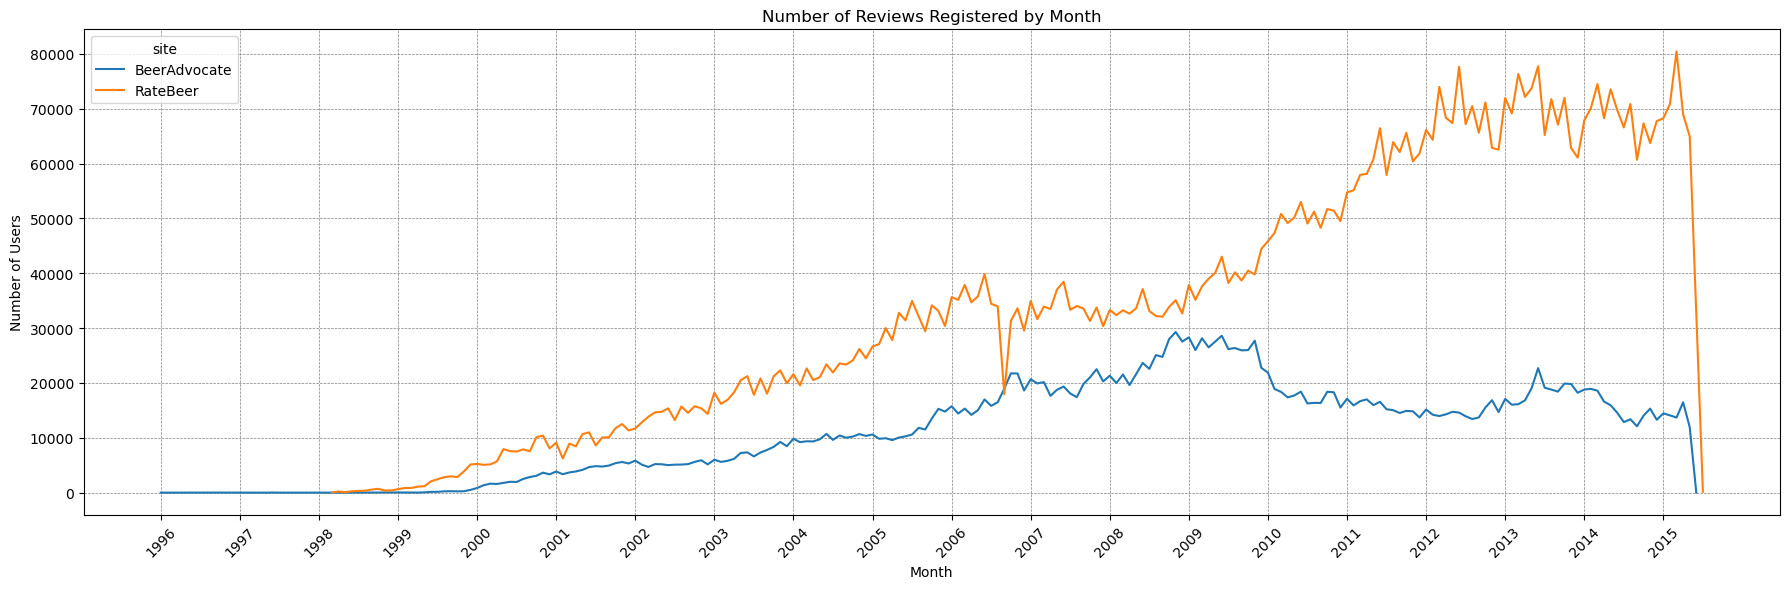

In [12]:
ba_reviews_plot = ba_reviews.copy()
rb_reviews_plot = rb_reviews.copy()
ba_reviews_plot["site"] = "BeerAdvocate"
rb_reviews_plot["site"] = "RateBeer"

# reviews concatenation
df_plot = pd.concat([ba_reviews_plot, rb_reviews_plot], ignore_index=True)

# computation of month and year
df_plot['joined'] = pd.to_datetime(df_plot['date'], format='%d/%m/%Y')
df_plot["month_year"] = df_plot['joined'].dt.to_period('M')
min_year = int(df_plot['joined'].dt.to_period('Y').sort_values().astype(str).iloc[0])
df_plot["month_year"] = df_plot["month_year"].astype(str)
nb_month = df_plot["month_year"].nunique()

# groupby site and month 
df_plot = df_plot.groupby(["site","month_year"]).size().reset_index(name='nbr_users')

# figure
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_plot, x='month_year', y='nbr_users',hue="site")

# title and ticks
plt.grid(True, axis='both', color='gray', linestyle='--', linewidth=0.5)
plt.title('Number of Reviews Registered by Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(ticks = np.arange(0,nb_month,12), labels=[year for year in range(min_year,min_year+len(np.arange(0,nb_month,12)))], rotation=45)
plt.tight_layout()

plt.show()

## b) How are each platform’s activity distributed around the world over time ? 

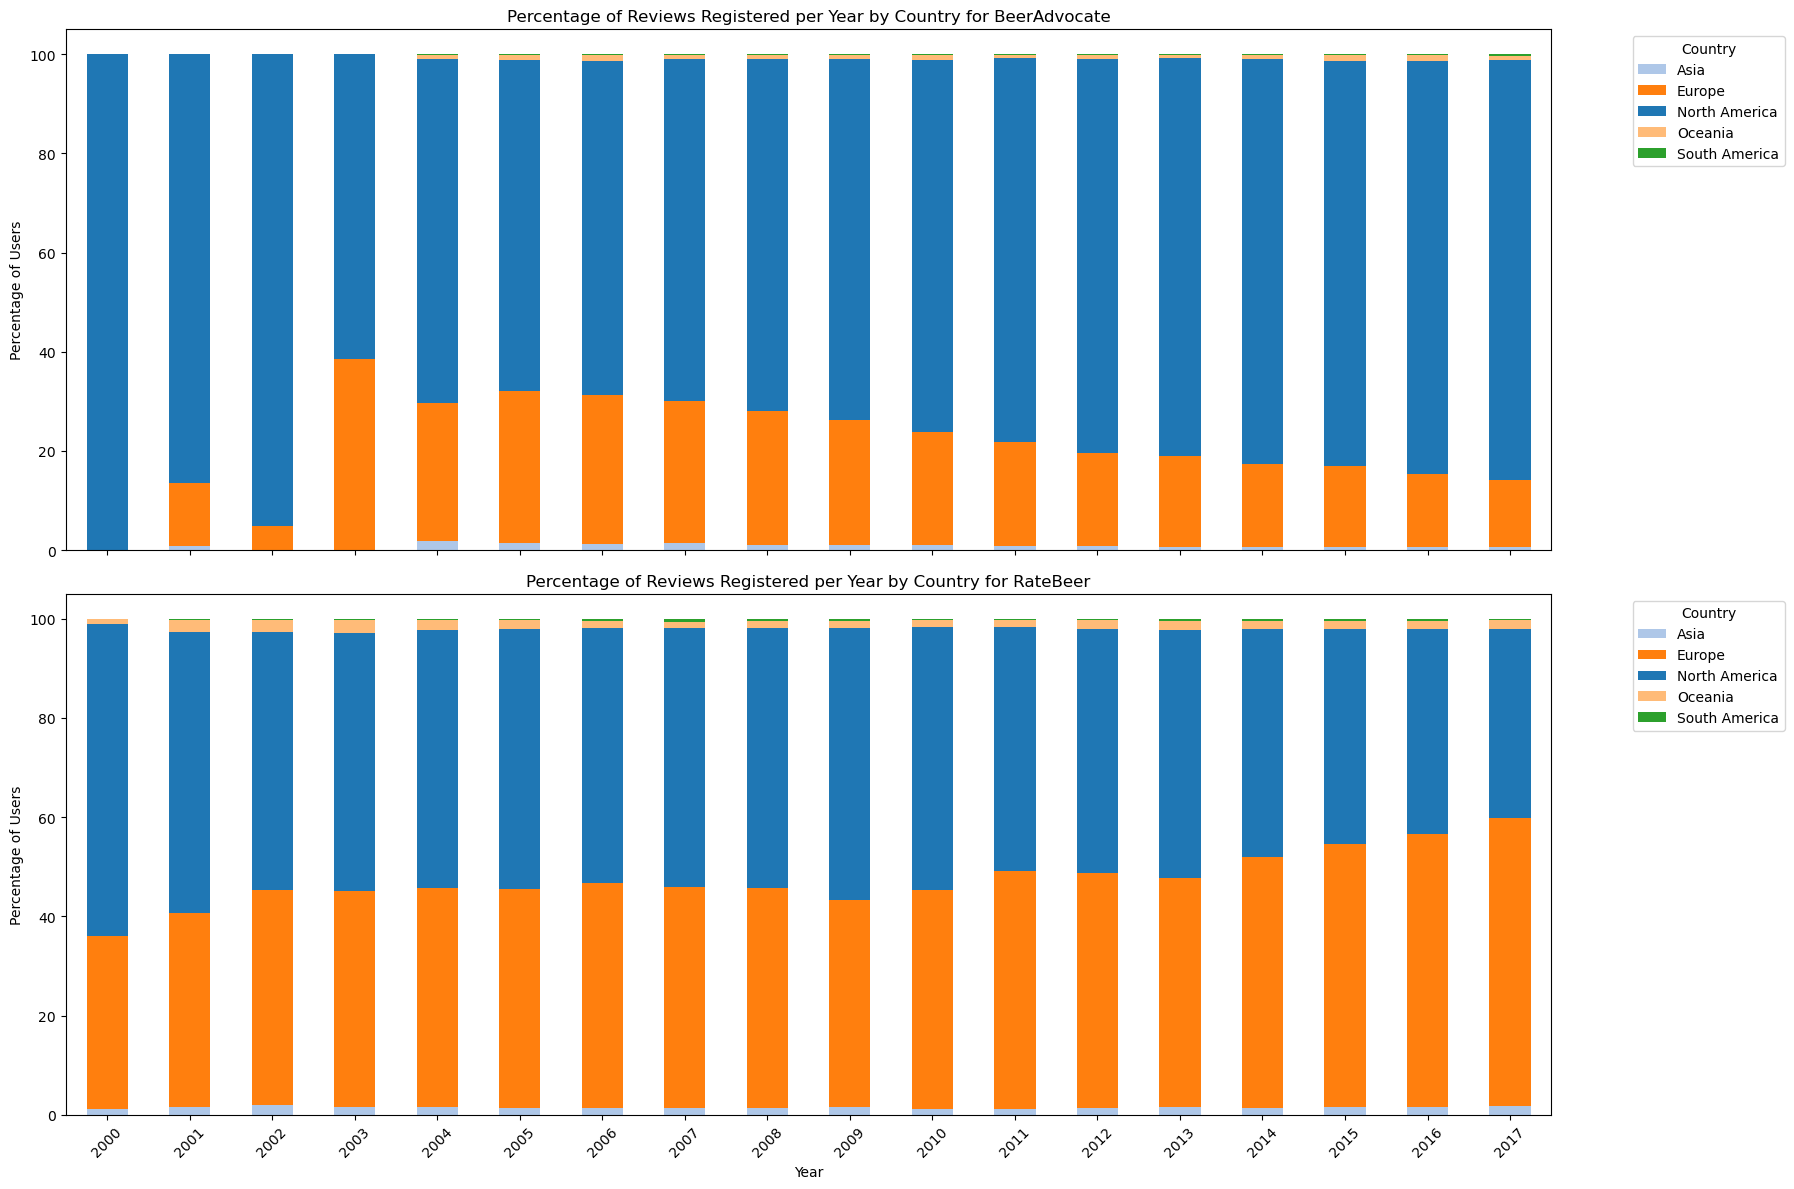

In [13]:
ba_reviews_plot = ba_reviews.copy()
rb_reviews_plot = rb_reviews.copy()
ba_reviews_plot["site"] = "BeerAdvocate"
rb_reviews_plot["site"] = "RateBeer"

# reviews concatenation
df_plot = pd.concat([ba_reviews_plot, rb_reviews_plot], ignore_index=True)

# computation of year
df_plot['joined'] = pd.to_datetime(df_plot['date'], format='%d/%m/%Y')
df_plot["year"] = df_plot['joined'].dt.to_period('Y')

# groupby site and month and continent
df_grouped = df_plot.groupby(['site', 'year', 'continent']).size().reset_index(name='nbr_users')

# selection if the 5 countries with the most users
top_countries = df_grouped.groupby(['site', 'continent'])['nbr_users'].sum()
top_countries = top_countries.groupby(level=0, group_keys=False).nlargest(5).reset_index()

df_top_countries = df_grouped.merge(top_countries[['site', 'continent']], on=['site', 'continent'])

# compute percentage
nbr_users_pct = df_top_countries.groupby(['site', 'year']).apply(
    lambda group: group['nbr_users'] / group['nbr_users'].sum() * 100,
    include_groups=False
).reset_index(level=[0, 1], drop=True)

df_top_countries['nbr_users_pct'] = nbr_users_pct.values

# compute palette
palette = sns.color_palette("tab20", len(df_top_countries['continent'].unique()))
country_palette = dict(zip(df_top_countries['continent'].unique(), palette))

# figure instance
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# iteration avec the site (BeerAdocate et BeerRate)
for i, (site, data) in enumerate(df_top_countries.groupby('site')):
    data_pivot = data.pivot(index='year', columns='continent', values='nbr_users_pct').fillna(0)
    # plot
    data_pivot.plot(kind='bar', stacked=True, ax=axes[i], color=[country_palette[country] for country in data_pivot.columns])
    axes[i].set_title(f'Percentage of Reviews Registered per Year by Country for {site}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Percentage of Users')
    axes[i].legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# ticks
plt.xticks(rotation=45)
plt.tight_layout()

# Affichez le graphique
plt.show()

# Task 3 : User activity : “On which platform are the reviewers most active ?”

## a) How is reviewers’ activity shared out ? What proportion of users have written more than 10 reviews ?

In [14]:
# pourcentage of reviews per active user (a user in considered active if he has > 10 reviews)
df_plot = rb_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
df_plot = df_plot[df_plot["nbr_reviews"] >= 10]
df_plot["mean"] = df_plot["nbr_reviews"] / df_plot["nbr_reviews"].sum()
display(df_plot)

,user_id,nbr_reviews,mean
1,100007,73,0.000010
2,100011,46,0.000007
3,100012,30,0.000004
7,100029,237,0.000034
9,100055,665,0.000095
...,...,...,...
70101,99908,26,0.000004
70102,99910,116,0.000017
70112,99959,93,0.000013
70119,99994,10,0.000001


In [15]:
# pourcentage of reviews per active user (a user in considered active if he has > 10 reviews)
df_plot = ba_reviews.groupby("user_id").size().reset_index(name="nbr_reviews")
df_plot = df_plot[df_plot["nbr_reviews"] >= 10]
df_plot["mean"] = df_plot["nbr_reviews"] / df_plot["nbr_reviews"].sum()
display(df_plot)

,user_id,nbr_reviews,mean
0,--dom--.709199,53,0.000021
8,-rick.912339,194,0.000078
11,-steve-.781156,37,0.000015
16,00trayn.654712,17,0.000007
17,01001111.219143,83,0.000034
...,...,...,...
62222,zundo.505087,53,0.000021
62233,zx6chris.371552,99,0.000040
62236,zylod.1082979,44,0.000018
62242,zymurgy4all.11427,95,0.000038


# Task 4 : General trends : “What are the top-rated beers, styles, and breweries by year ? And overall ?

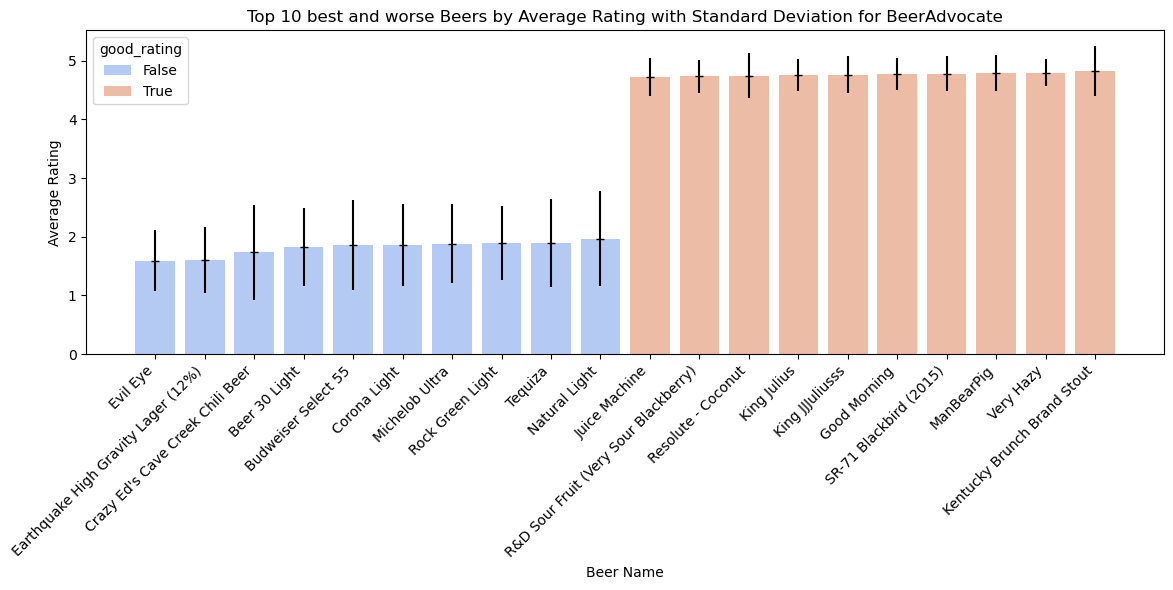

In [16]:
# groupby beername, and computing rating statistics
df_plot = ba_reviews.groupby("beer_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='beer_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['beer_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Beers by Average Rating with Standard Deviation for BeerAdvocate')
plt.xlabel('Beer Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

C:\Users\leroy\AppData\Local\Temp\ipykernel_17388\3739893649.py:19: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leroy\anaconda3\envs\ada\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


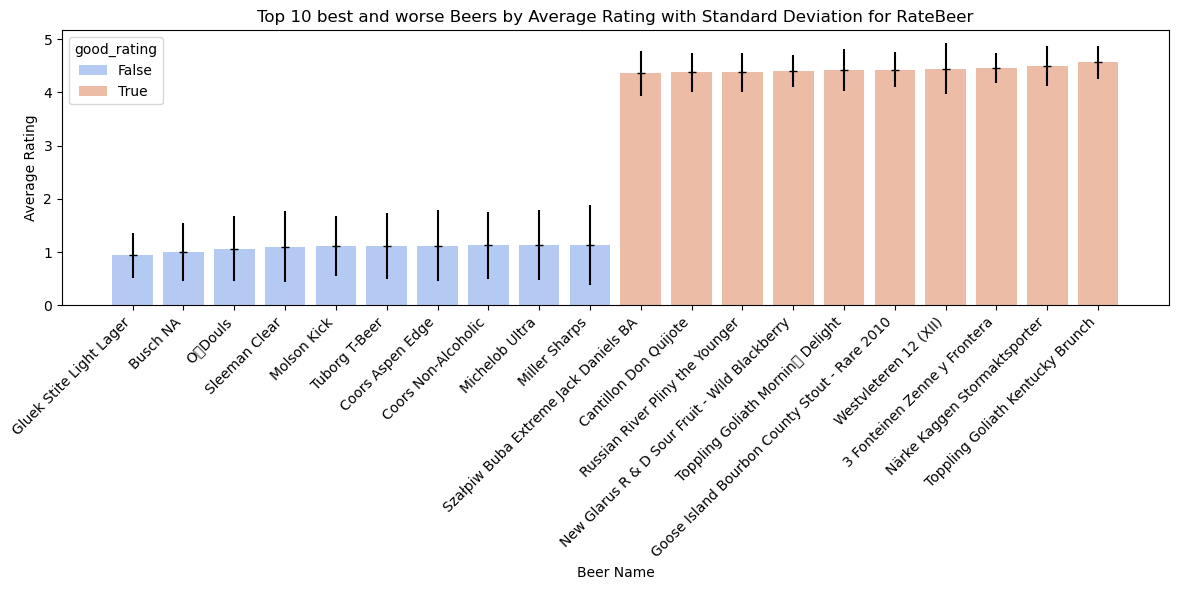

In [17]:
# groupby beername, and computing rating statistics
df_plot = rb_reviews.groupby("beer_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='beer_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['beer_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Beers by Average Rating with Standard Deviation for RateBeer')
plt.xlabel('Beer Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

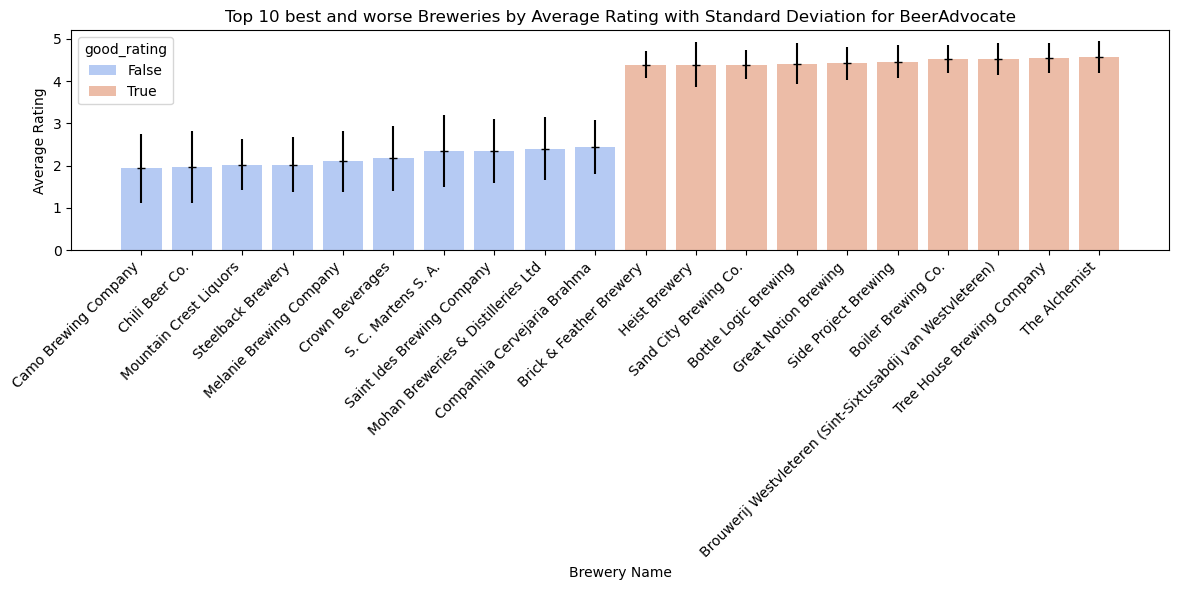

In [18]:
# groupby breweryname, and computing rating statistics
df_plot = ba_reviews.groupby("brewery_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='brewery_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['brewery_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Breweries by Average Rating with Standard Deviation for BeerAdvocate')
plt.xlabel('Brewery Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

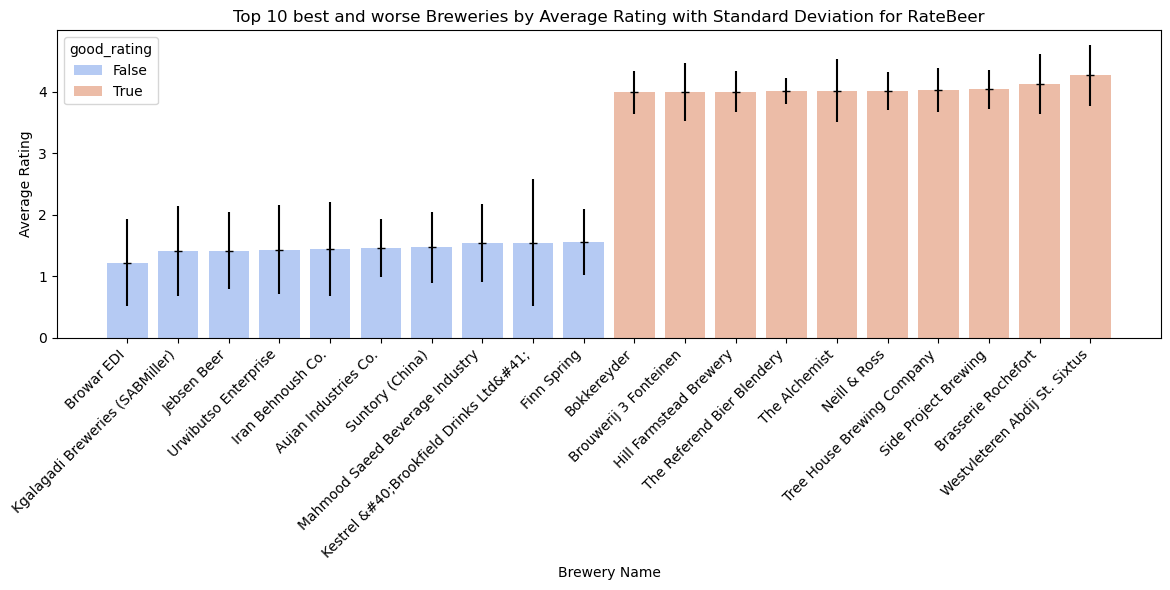

In [19]:
# groupby breweryname, and computing rating statistics
df_plot = rb_reviews.groupby("brewery_name").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(10,("rating","mean")),df_plot.nsmallest(10,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='brewery_name', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['brewery_name'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 10 best and worse Breweries by Average Rating with Standard Deviation for RateBeer')
plt.xlabel('Brewery Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Task 5 : User rating “How do reviewers rate the main types of beer on average on each platform ?”

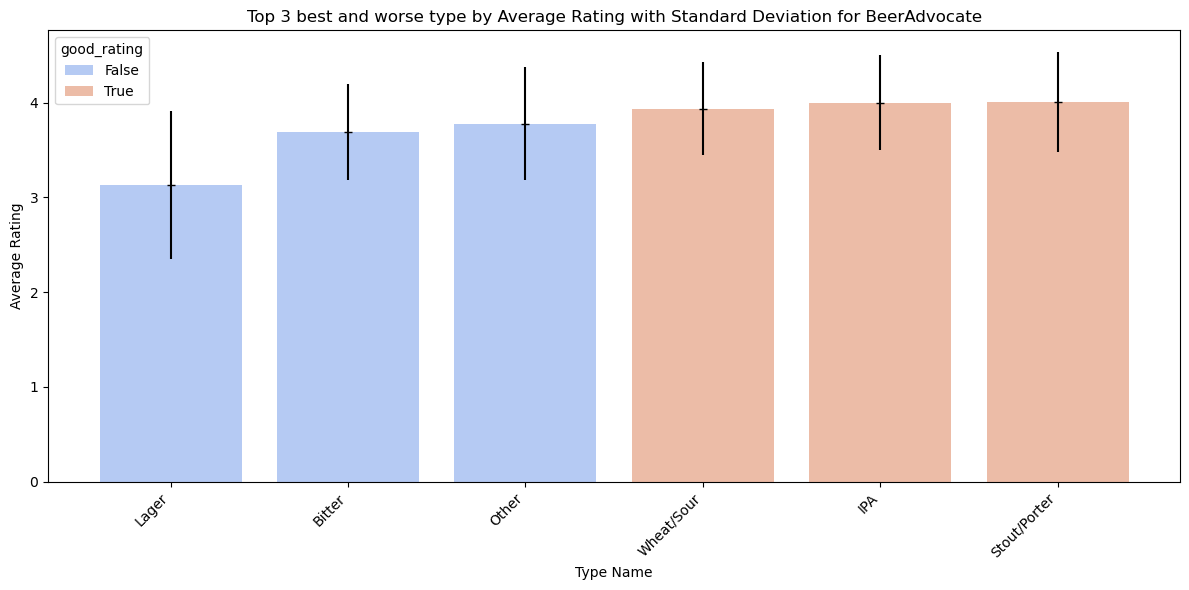

In [20]:
# groupby type, and computing rating statistics
df_plot = ba_reviews.groupby("type").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(3,("rating","mean")),df_plot.nsmallest(3,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='type', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['type'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 3 best and worse type by Average Rating with Standard Deviation for BeerAdvocate')
plt.xlabel('Type Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

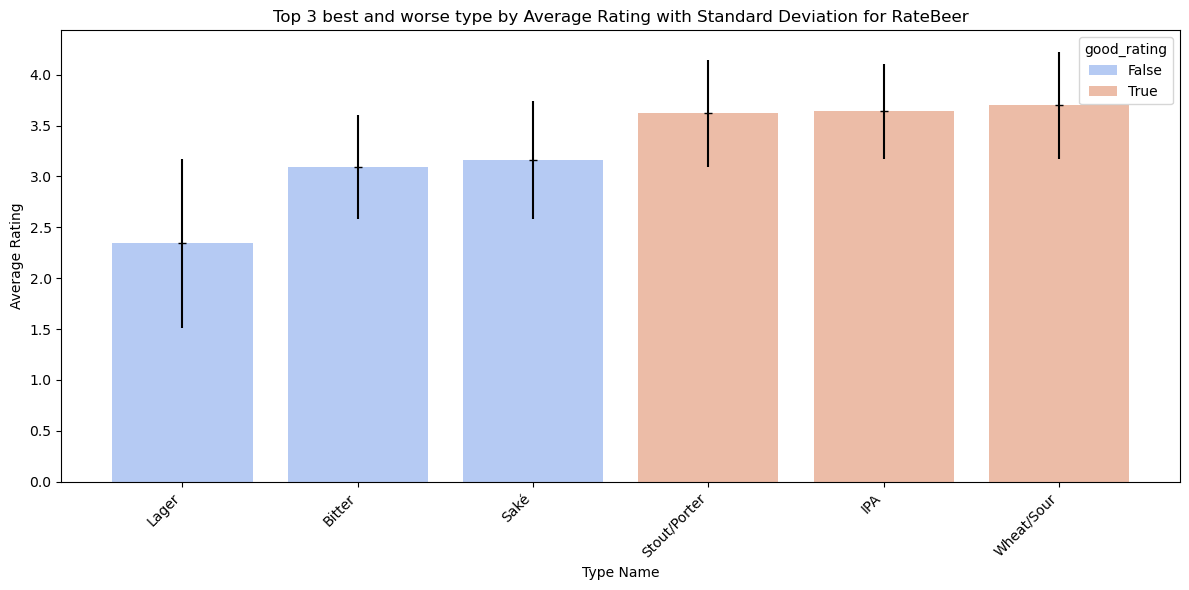

In [21]:
# groupby type, and computing rating statistics
df_plot = rb_reviews.groupby("type").agg({"rating":["max","min","mean","median","std","sem","count"]}).reset_index()
df_plot = df_plot[df_plot[("rating","count")] >= 50]
median_mean = df_plot[("rating","mean")].median()
df_plot["good_rating"] = df_plot[("rating","mean")].apply(lambda x: x>median_mean)
df_plot = pd.concat((df_plot.nlargest(3,("rating","mean")),df_plot.nsmallest(3,("rating","mean"))))
df_plot = df_plot.sort_values([("rating","mean")])

# figure
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='type', y=("rating","mean"), hue="good_rating",palette='coolwarm')
plt.errorbar(df_plot['type'], df_plot[("rating","mean")], yerr=df_plot[("rating","std")], fmt="_", color="black")

# title and ticks
plt.title('Top 3 best and worse type by Average Rating with Standard Deviation for RateBeer')
plt.xlabel('Type Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()